# Importing Libraries

In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import warnings
warnings.filterwarnings('ignore')

In [ ]:

from google.colab import drive
drive.mount('/content/drive')


Mounted at /content/drive


In [ ]:
df = pd.read_csv('/content/drive/MyDrive/Colab Notebooks/marketing_AB.csv', index_col=0)

In [ ]:
df.head()

,user id,test group,converted,total ads,most ads day,most ads hour
0,1069124,ad,False,130,Monday,20
1,1119715,ad,False,93,Tuesday,22
2,1144181,ad,False,21,Tuesday,18
3,1435133,ad,False,355,Tuesday,10
4,1015700,ad,False,276,Friday,14


	test group is "ad" then user saw the advertisement, "psa" they only saw the public service announcement

# Data Preprocessing

In [ ]:
df.duplicated(subset='user id').sum()

0

In [ ]:
df.rename(columns={'user id':'user_id', 'test group':'test_group', 'total ads':'total_ads', 'most ads day':'most_ads_day', 'most ads hour':'most_ads_hour'}, inplace=True)

In [ ]:
df.head()

,user_id,test_group,converted,total_ads,most_ads_day,most_ads_hour
0,1069124,ad,False,130,Monday,20
1,1119715,ad,False,93,Tuesday,22
2,1144181,ad,False,21,Tuesday,18
3,1435133,ad,False,355,Tuesday,10
4,1015700,ad,False,276,Friday,14


In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 588101 entries, 0 to 588100
Data columns (total 6 columns):
 #   Column         Non-Null Count   Dtype 
---  ------         --------------   ----- 
 0   user_id        588101 non-null  int64 
 1   test_group     588101 non-null  object
 2   converted      588101 non-null  bool  
 3   total_ads      588101 non-null  int64 
 4   most_ads_day   588101 non-null  object
 5   most_ads_hour  588101 non-null  int64 
dtypes: bool(1), int64(3), object(2)
memory usage: 27.5+ MB


In [ ]:
df.isna().sum()

,0
user_id,0
test_group,0
converted,0
total_ads,0
most_ads_day,0
most_ads_hour,0


In [ ]:
df_cat = df[['test_group', 'converted', 'most_ads_day', 'most_ads_hour']]
df_cat.nunique()

,0
test_group,2
converted,2
most_ads_day,7
most_ads_hour,24


Checking the unique values for categorical features

In [ ]:
for i in df_cat.columns:
  print(f'{i.upper()} -> {df_cat[i].unique()}')

TEST_GROUP -> ['ad' 'psa']
CONVERTED -> [False  True]
MOST_ADS_DAY -> ['Monday' 'Tuesday' 'Friday' 'Saturday' 'Wednesday' 'Sunday' 'Thursday']
MOST_ADS_HOUR -> [20 22 18 10 14 13 19 11 12 16 21  3 23  4  8  0  2 15  1  6 17  7  9  5]



*   test_group -> ads,
*   most_ads_days -> 7 Mon-Sun
*   most_ads_hours -> 24 hours timing







In [ ]:
df.drop('user_id', axis=1, inplace=True)

In [ ]:
df.describe(include='all')

,test_group,converted,total_ads,most_ads_day,most_ads_hour
count,588101,588101,588101.000000,588101,588101.000000
unique,2,2,NaN,7,NaN
top,ad,False,NaN,Friday,NaN
freq,564577,573258,NaN,92608,NaN
mean,NaN,NaN,24.820876,NaN,14.469061
std,NaN,NaN,43.715181,NaN,4.834634
min,NaN,NaN,1.000000,NaN,0.000000
25%,NaN,NaN,4.000000,NaN,11.000000
50%,NaN,NaN,13.000000,NaN,14.000000
75%,NaN,NaN,27.000000,NaN,18.000000


# Data Visualization

In [ ]:
plt.style.use('https://github.com/dhaitz/matplotlib-stylesheets/raw/master/pitayasmoothie-dark.mplstyle')

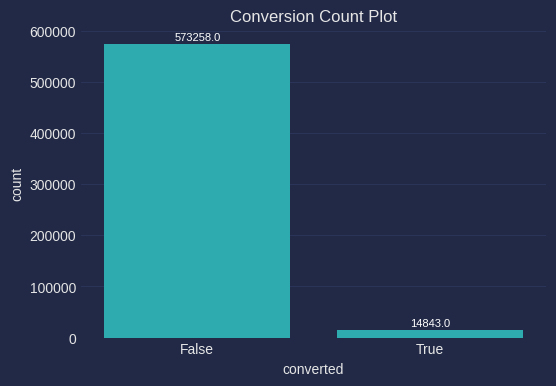

In [ ]:

plt.figure(figsize=(6, 4))
ax = sns.countplot(x='converted', data=df)
plt.title('Conversion Count Plot')
for p in ax.patches:
    ax.annotate(f'{p.get_height()}', (p.get_x() + p.get_width() / 2., p.get_height()),
                ha='center', va='center', fontsize=8, color='white', xytext=(0, 5),
                textcoords='offset points')

plt.show()

From above count plot we observe that conversion rate is 2.5%

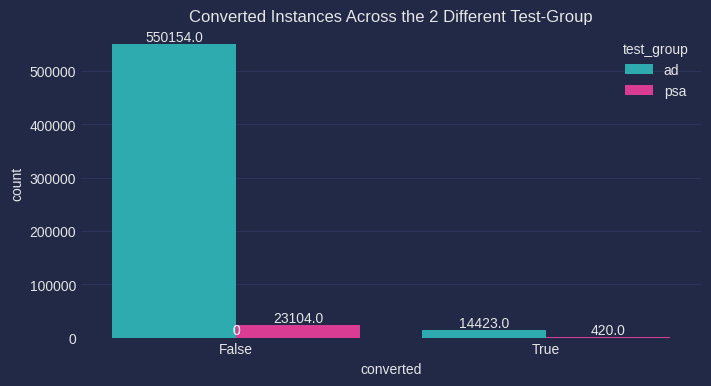

In [ ]:
plt.figure(figsize=(8, 4), dpi=100)
sns.countplot(data=df, x='converted', hue='test_group')
plt.title('Converted Instances Across the 2 Different Test-Group')
for p in plt.gca().patches:
    plt.gca().annotate(f'{p.get_height()}', (p.get_x() + p.get_width() / 2, p.get_height()), ha='center', va='bottom')

plt.show()

Checking the conversion ratios for each group. From above count plot we observe that adversting has better conversions than psa group.

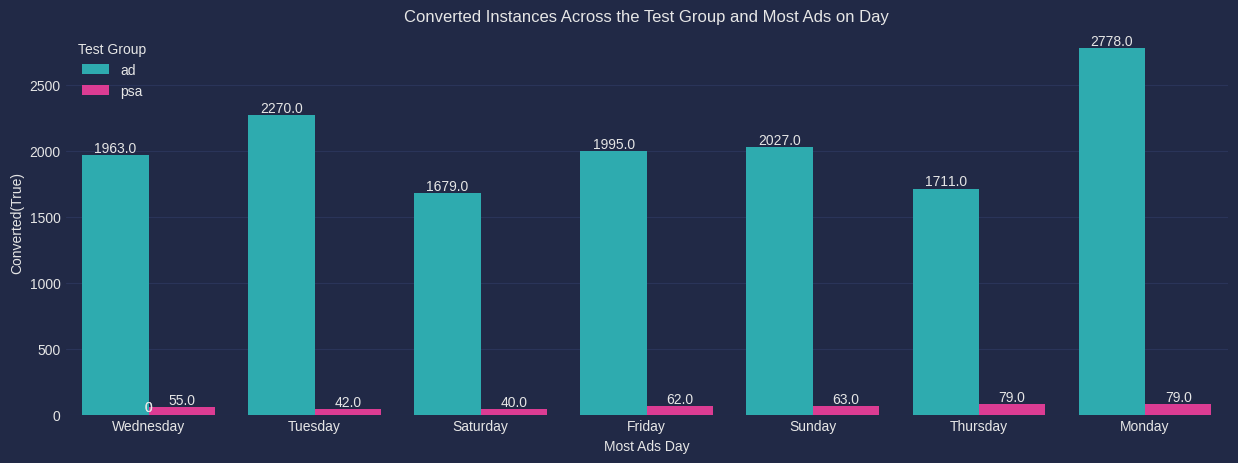

In [ ]:
plt.figure(figsize=(15, 5), dpi=100)
sns.countplot(data=df[df['converted'] == True], x='most_ads_day', hue='test_group')

plt.title('Converted Instances Across the Test Group and Most Ads on Day')
plt.xlabel('Most Ads Day')
plt.ylabel('Converted(True)')
plt.legend(title='Test Group', loc='upper left')

for p in plt.gca().patches:
    plt.gca().annotate(f'{p.get_height()}', (p.get_x() + p.get_width() / 2, p.get_height()), ha='center', va='bottom')

plt.show()

***We observe most of the users purchases on monday when compared to other days.***

***And Majority conversions happend during Noon(12-4PM)***

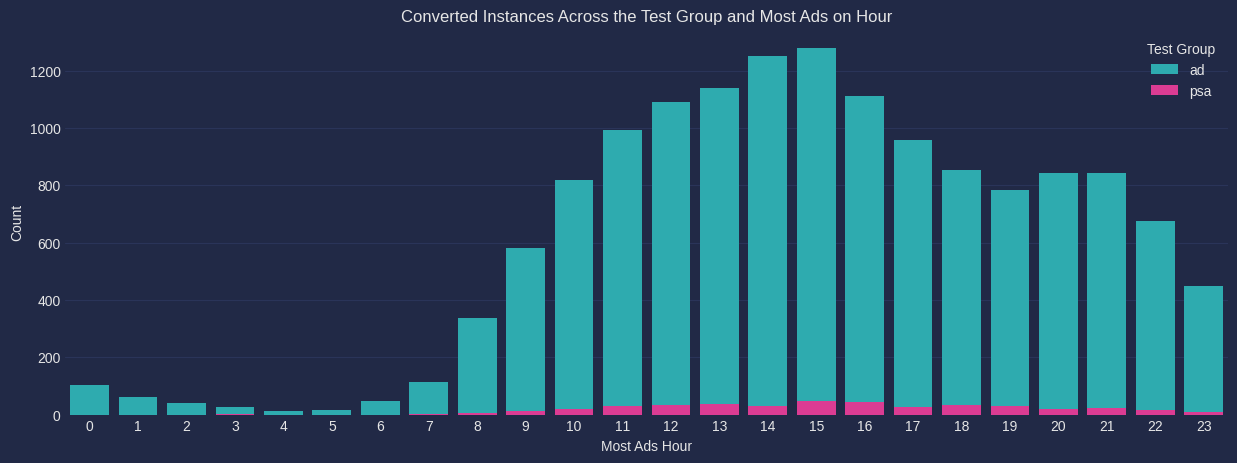

In [ ]:
plt.figure(figsize=(15, 5), dpi=100)
sns.countplot(x='most_ads_hour', hue='test_group', data=df[df['converted'] == True], dodge=False)
plt.title('Converted Instances Across the Test Group and Most Ads on Hour')
plt.xlabel('Most Ads Hour')
plt.ylabel('Count')
plt.legend(title='Test Group')
plt.show()

# Statistical Analysis

Checking the mean for total ads between the groups. And we observe there is a significance difference in central tendency between two group distribution.

In [ ]:

# Calculate the mean of 'total_ads' for converted and not converted users
converted_mean = df[df['converted'] == True]['total_ads'].mean()
not_converted_mean = df[df['converted'] == False]['total_ads'].mean()

print(f"Mean of 'total_ads' for converted users: {converted_mean}")
print(f"Mean of 'total_ads' for not converted users: {not_converted_mean}")

Mean of 'total_ads' for converted users: 83.88775853937884
Mean of 'total_ads' for not converted users: 23.291495277867906


As majority of dataset features are categorical we will perform the chisquare test for our conversions and checking if any feature has any significance on conversion

Ho - has no significance between variables and converted

Ha - has significance

In [ ]:
from scipy.stats import chi2_contingency

alpha=0.5
for i in df_cat.columns:
  if i != 'converted':
    contingency_table = pd.crosstab(df_cat[i], df_cat['converted'])
    chi2, p, degree_freedom, expecetd_mean = chi2_contingency(contingency_table)
    print(f"\nChi-Squared test for {i}:")
    print(f"Chi-Squared value: {chi2}")
    print(f"P-value: {p}")

    if p<alpha:
      print(f"Null hypothesis rejected as {i} has significant association with conversion")
    else:
      print(f"{i} has no significant association with conversion")


Chi-Squared test for test_group:
Chi-Squared value: 54.005823883685245
P-value: 1.9989623063390075e-13
Null hypothesis rejected as test_group has significant association with conversion

Chi-Squared test for most_ads_day:
Chi-Squared value: 410.0478857936585
P-value: 1.932184379244731e-85
Null hypothesis rejected as most_ads_day has significant association with conversion

Chi-Squared test for most_ads_hour:
Chi-Squared value: 430.76869230822086
P-value: 8.027629823696771e-77
Null hypothesis rejected as most_ads_hour has significant association with conversion


Checking normal distribution between two groups using the shapiro, whether to use parametric or non-parametric statistical tests.
Levene is used to check the variance difference between groups

In [ ]:
# checking normality and variance wrt numeric column total_ads

from scipy.stats import shapiro, levene, ttest_ind, mannwhitneyu

shapiro_stat_true, shapiro_p_value_true = shapiro(df[df['converted'] == True]['total_ads'])
shapiro_stat_false, shapiro_p_value_false = shapiro(df[df['converted'] == False]['total_ads'])

print(shapiro_p_value_true)
print(shapiro_p_value_false)

levene_stat, levene_p_value = levene(df[df['converted'] == True]['total_ads'], df[df['converted'] == False]['total_ads'])
print(levene_p_value)

1.638680987007771e-98
9.883049430735801e-204
0.0


<Axes: xlabel='total_ads', ylabel='Count'>

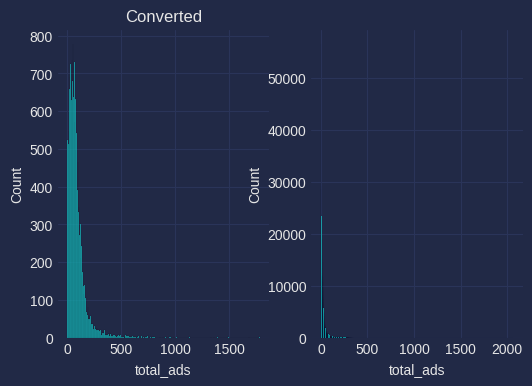

In [ ]:
plt.figure(figsize=(6,4))
plt.subplot(1,2,1)
sns.histplot(df[df['converted'] == True]['total_ads'])
plt.title('Converted')
plt.subplot(1,2,2)
sns.histplot(df[df['converted'] == False]['total_ads'])

Performing the ManWhitney U-test for non-parametric statistical test

In [ ]:
alpha = 0.05
# perform test statistics based on p-values
if shapiro_p_value_true and shapiro_p_value_false > alpha and levene_p_value > alpha:
  #Parametric T-test for mean
  t_stat, t_p_value = ttest_ind(df[df['converted'] == True]['total_ads'], df[df['converted'] == False]['total_ads'])
  print(f"T-statistic: {t_stat}")
  print(f"P-value: {t_p_value}")
else:
  #Nonparametric ManWhitney U-test for median
  u_stat, u_p_value = mannwhitneyu(df[df['converted'] == True]['total_ads'], df[df['converted'] == False]['total_ads'])
  print(f"U-statistic: {u_stat}")
  print(f"P-value: {u_p_value}")
#

U-statistic: 7269106736.0
P-value: 0.0


From above results p-value < 0.05, hence we can reject null hypothesis.
We can conclude there is a significance between two groups.